### Data collection 

In this project will be using historic weather data from [Wunderground](http://www.wunderground.com/history) to try and plan a summer holiday in the india

### Import the module and Datasets

In [1]:
from pandas import*
%matplotlib inline

In [2]:
df = read_csv("Delhi_2014.csv")
df.head() # first view of datasets

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,-4,-7,-9,-9,-10,-11,82,70,58,...,2,2,2,6,2,NaN,0.0,8.0,NaN,-1<br />
1,2014-1-2,-1,-4,-8,-6,-8,-11,75,69,53,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1<br />
2,2014-1-3,1,-3,-8,-4,-6,-10,84,72,54,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1<br />
3,2014-1-4,-1,-2,-3,-4,-5,-6,80,74,64,...,8,4,2,14,2,NaN,0.0,8.0,NaN,-1<br />
4,2014-1-5,-1,-3,-6,-4,-6,-8,93,79,71,...,6,3,2,14,2,NaN,0.0,8.0,Snow,-1<br />


### Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

### Removing initial spaces
To make columns fit for the dataframe and horizontally in this notebook.

In [3]:
df.columns 

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees<br />'],
      dtype='object')

In [4]:
df = read_csv('Delhi_2014.csv', skipinitialspace=True) # skipinitialspace argument to skip the initial spaces..
df.columns # perfect...

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees<br />'],
      dtype='object')

### Removing extra characters: />']

In [5]:
df['WindDirDegrees<br />'].head() # having extra characters <br />

0    -1<br />
1    -1<br />
2    -1<br />
3    -1<br />
4    -1<br />
Name: WindDirDegrees<br />, dtype: object

In [6]:
df = df.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'}) # change by rename()

In [7]:
df['WindDirDegrees'] = df['WindDirDegrees'].str.rstrip('<br />') # Using rstrip() to remove the '< br />' html line breaks from the values in the 'WindDirDegrees'

In [8]:
df['WindDirDegrees'].head()

0    -1
1    -1
2    -1
3    -1
4    -1
Name: WindDirDegrees, dtype: object

### Working with missing value

Missing (also called null or not available) values are marked as NaN (not a number) in dataframes.


In [9]:
df.head(2)

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-1-1,-4,-7,-9,-9,-10,-11,82,70,58,...,2,2,2,6,2,NaN,0.0,8.0,NaN,-1
1,2014-1-2,-1,-4,-8,-6,-8,-11,75,69,53,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1


 The column method fillna()  to deal with missing values is to replace them by some value.

In [10]:
df['Events'] = df['Events'].fillna('')
df[df['Events'].isnull()]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees


In [11]:
df['Max Gust SpeedKm/h'] = df['Max Gust SpeedKm/h'].fillna('')
df[df['Max Gust SpeedKm/h'].isnull()]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees


### Changing the value type of a column
* astype()to change the values in the 'WindDirDegrees' column to int64
* The function to_datetime() is needed to change the values in the 'GMT' column from strings (object) to dates (datetime64)

In [12]:
df['WindDirDegrees'] = df['WindDirDegrees'].astype('int64')

In [13]:
df['Date'] = to_datetime(df['Date'])

In [14]:
df.dtypes

Date                          datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                    object
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

In [15]:
df.index = df['Date']

In [16]:
df.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,-4,-7,-9,-9,-10,-11,82,70,58,...,2,2,2,6,2,,0.0,8.0,,-1
2014-01-02,2014-01-02,-1,-4,-8,-6,-8,-11,75,69,53,...,3,2,2,6,0,,0.0,8.0,,-1
2014-01-03,2014-01-03,1,-3,-8,-4,-6,-10,84,72,54,...,3,2,2,6,0,,0.0,8.0,,-1
2014-01-04,2014-01-04,-1,-2,-3,-4,-5,-6,80,74,64,...,8,4,2,14,2,,0.0,8.0,,-1
2014-01-05,2014-01-05,-1,-3,-6,-4,-6,-8,93,79,71,...,6,3,2,14,2,,0.0,8.0,Snow,-1


### Finding a summer break
According to Google, Summer extends for the whole months of April to June in India and the Spring whole months of Feburary to March. I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [17]:
from datetime import datetime
df[df['Date'] == datetime(2014, 4, 1)] 

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,2014-04-01,9,1,-7,-2,-6,-9,93,57,28,...,11,10,10,21,6,,0.0,2.0,,186


In [18]:
summer = df.loc[datetime(2014,3,31) : datetime(2014,6,30)]

I now look for the days with warm temperatures.

In [19]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-20,2014-06-20,36,26,16,12,9,2,56,24,10,...,14,11,10,21,5,,0.0,NaN,,-1
2014-06-21,2014-06-21,37,27,17,12,7,0,51,25,5,...,19,14,10,23,6,,0.0,NaN,,167
2014-06-22,2014-06-22,37,27,17,9,5,-6,34,21,4,...,14,11,10,23,6,,0.0,1.0,,106
2014-06-23,2014-06-23,33,26,18,14,11,4,50,34,16,...,11,10,10,26,8,,0.0,1.0,,31
2014-06-24,2014-06-24,31,25,19,13,11,7,56,36,19,...,14,11,10,26,10,,0.0,2.0,Thunderstorm,6
2014-06-28,2014-06-28,34,26,18,16,9,8,69,30,16,...,18,13,10,19,6,,0.0,3.0,,8
2014-06-29,2014-06-29,34,26,18,13,11,8,57,35,15,...,11,10,10,21,8,,0.0,1.0,Thunderstorm,327
2014-06-30,2014-06-30,32,25,18,15,13,6,68,41,20,...,11,10,10,21,6,,0.0,1.0,,10


* Spring Feburary to March: Sunny and pleasant.
* Summer April to June: Hot

Summer 2014 was rather cool in London: there are no days with temperatures of 25 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

### Visualising the data

Now let's plot the 'Mean TemperatureC' for the summer:

<AxesSubplot:xlabel='Date'>

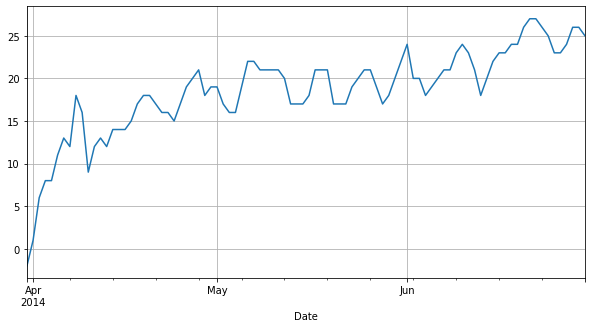

In [21]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well, looking at the graph the april to third of June looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

<AxesSubplot:xlabel='Date'>

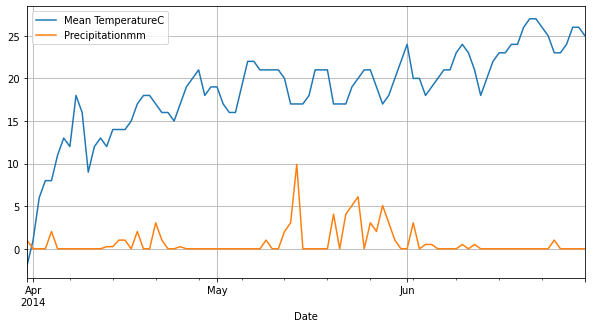

In [22]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The april to third of June  is still looking good, with just a couple of peaks showing amount of rain. Let's have a closer look by just plotting mean temperature and precipitation for april to third of June.

<AxesSubplot:xlabel='Date'>

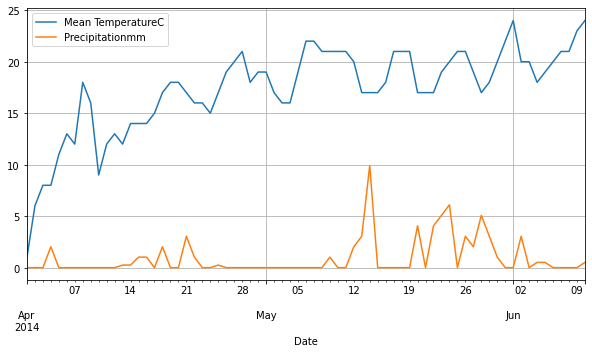

In [26]:
july = summer.loc[datetime(2014,4,1) : datetime(2014,6,10)]
july[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, april to third of June looks pretty good, just couple of days that have significant rain, and  the mean temperature drops below 20 degrees.

### Conclusions

The graphs have shown the volatility of a indian summer, but a couple of weeks were found when the weather wasn't too bad in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years too.